In [1]:
import json
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [2]:
project_path = Path("/projects/b1171/ylk4626/project/Chimera")

# Chimeric Reads Summary

In [3]:

# [2024-10-18T19:49:58Z INFO  annotate] "data/raw/PC3_bulk_WGS_Mk1c_clean.bam" collect 28989 chimeric events
# [2024-10-18T19:49:58Z INFO  annotate] "data/raw/PC3_bulk_WGS_P2_clean.bam" collect 296714 chimeric events
# [2024-10-18T19:49:58Z INFO  annotate] "data/raw/PC3_bulk_WGS_Pacbio_clean.bam" collect 114430 chimeric events
# [2024-10-18T19:50:23Z INFO  annotate] "data/raw/PC3_10_cells_MDA_Mk1c_dirty.bam" collect 2009913 chimeric events
# [2024-10-18T19:57:05Z INFO  annotate] "data/raw/PC3_10_cells_MDA_P2_dirty.bam" collect 15932558 chimeric events


chimeric_data  = {
    "PC3_bulk_WGS_Mk1c_clean": 28989, 
    "PC3_bulk_WGS_P2_clean": 296714, 
    "PC3_bulk_WGS_Pacbio_clean": 114430, 
    "PC3_10_cells_MDA_Mk1c_dirt": 2009913,
    "PC3_10_cells_MDA_P2_dirty": 15932558
}


([0, 1, 2, 3, 4],
 [Text(0, 0, 'PC3_bulk_WGS_Mk1c_clean'),
  Text(1, 0, 'PC3_bulk_WGS_P2_clean'),
  Text(2, 0, 'PC3_bulk_WGS_Pacbio_clean'),
  Text(3, 0, 'PC3_10_cells_MDA_Mk1c_dirt'),
  Text(4, 0, 'PC3_10_cells_MDA_P2_dirty')])

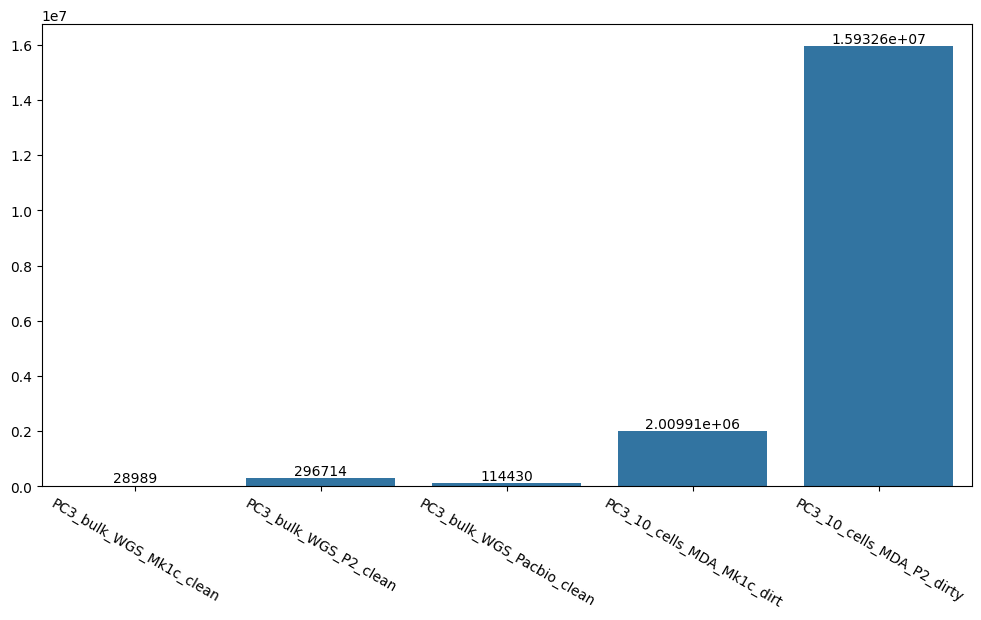

In [4]:
plt.figure(figsize=(12,6))
g=sns.barplot(chimeric_data)
g.bar_label(g.containers[0])
plt.xticks(rotation=-30)

# Check unique

In [5]:
unique_data= json.load(open(project_path/ "analysis/PC3_10_cells_MDA_Mk1c_dirty.sup.json"))

In [70]:
unique_data

{'93a37edf-2689-4b37-9b0e-59d536217800': 0,
 '6e6726af-be78-44b0-882a-528f5b93c6c3': 0,
 'bf36256b-6f0f-4781-8146-4436caadc361': 0,
 'f7fc9cb5-9130-4482-a464-ee942ccaaf7f': 0,
 '81129037-80bf-4a15-9429-f74dba42a303': 0,
 '72d05e48-c60f-4fd4-bb0a-03ba9809c596': 0,
 '98820192-8d77-41d9-839c-ebde5f07e7d1': 0,
 '0eddfea9-2b73-4095-b818-0e1f0075cab2': 0,
 'b1d8e127-73fc-44fa-a5c2-680805eaed30': 0,
 '088c115e-cc09-4feb-a1f3-b5097e88ec68': 0,
 '402ad463-38ce-4e4f-bb3f-b67bcc3cddb9': 0,
 'aedf5b53-4e0f-4158-b17f-1e80ecf7cef1': 0,
 'ee86307f-1685-4dba-bc68-899ee44d379a': 0,
 'c800c8c5-d7cb-4abb-9b6e-3957200e576c': 0,
 '5c8e0b7d-06c3-423e-916d-3f2713a967d7': 0,
 'b531d397-4b7a-4d0e-8654-1085147863c7': 0,
 '0f8ea554-bcea-443d-bcc5-32d0c5e17bf6': 0,
 'fc07eaec-ba43-4da2-bfae-4e24a7698c3b': 0,
 '089b99b9-ddb7-400d-bfd7-ad62ab065d48': 0,
 '5f081ce6-296e-4963-aff9-a1dd69bece6e': 0,
 '97a592a0-8d73-47f5-b660-f008d8d4e3a1': 0,
 '4217e197-9553-44f1-818b-edd9fe8027d9': 0,
 '0a6c975b-375e-45fb-bd05-9ea685

In [71]:
len(unique_data)

2009913

In [72]:
from collections import Counter

In [73]:
sm = Counter(unique_data.values())

In [74]:
sm

Counter({0: 1921409, 1: 82742, 2: 3645, 3: 2117})

[Text(0, 0, '1.92141e+06'),
 Text(0, 0, '82742'),
 Text(0, 0, '3645'),
 Text(0, 0, '2117')]

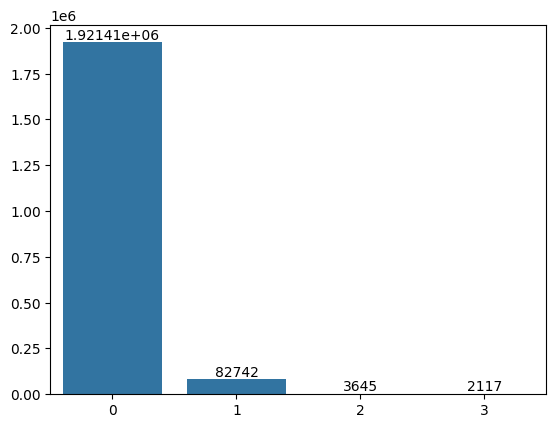

In [75]:
g = sns.barplot(sm)
g.bar_label(g.containers[0])

In [9]:
import pysam

In [10]:
def collection_read_length(bam_file):
    bam_file = pysam.AlignmentFile(bam_file)
    result = {}
    for read  in bam_file:
            result[read.query_name] = read.query_length
    return result

In [11]:
bam_read_leng = collection_read_length(project_path/ "data/raw/PC3_10_cells_MDA_Mk1c_dirty.bam")

In [12]:
unique_data_length = {}
for k,v in unique_data.items():
    unique_data_length[k] = bam_read_leng[k]

In [13]:
unique_data_length_g0 = {}
for k,v in unique_data.items():
    if v == 0:
        unique_data_length_g0[k] = unique_data_length[k]

In [16]:
def get_read_length_by_group(group: int, unique_data, unique_data_length):
    result = {}
    for k,v in unique_data.items():
        if v == group:
            result[k] = unique_data_length[k]
    return result

def get_read_length_all_group(unique_data, unique_data_length):
    from collections import defaultdict
    result = defaultdict(list)
    
    for k,v in unique_data.items():
        result[v].append(unique_data_length[k])
    
    return result

In [17]:
read_length_all_group = get_read_length_all_group(unique_data, unique_data_length)

dict_keys([2, 3, 0, 1])

In [14]:
len(unique_data_length_g0)

1929824

<Axes: ylabel='Count'>

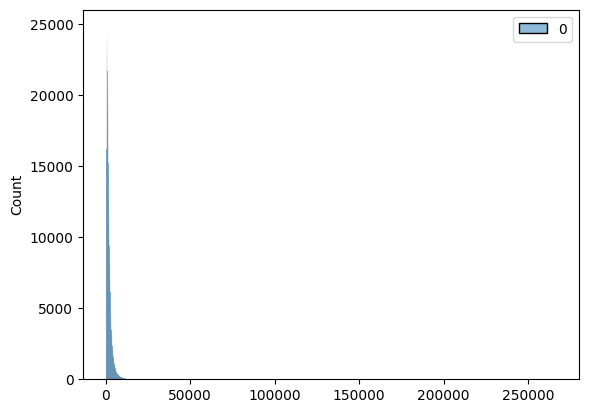

In [39]:
sns.histplot(unique_data_length_g0.values())

(0.0, 50000.0)

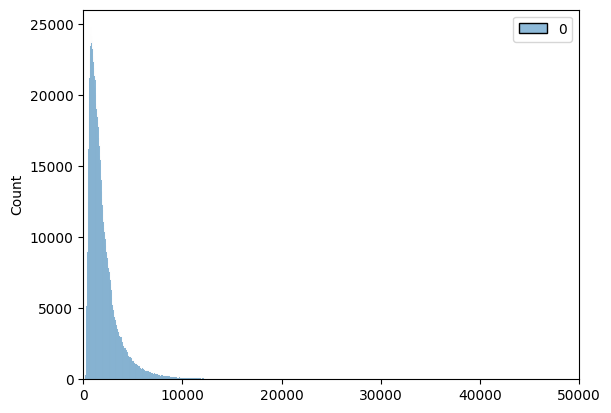

In [41]:
sns.histplot(unique_data_length_g0.values())
plt.xlim(0, 50000)

(0.0, 15000.0)

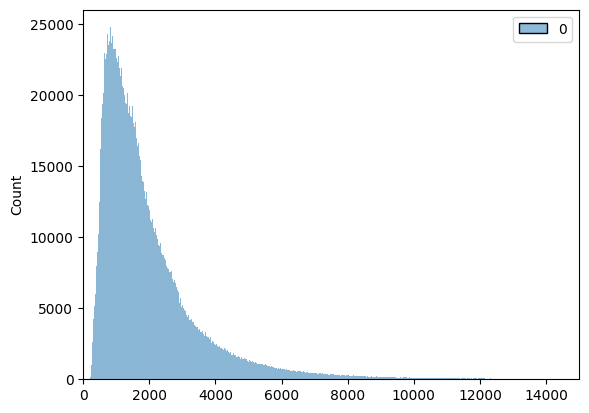

In [42]:
sns.histplot(unique_data_length_g0.values())
plt.xlim(0, 15000)

<Axes: >

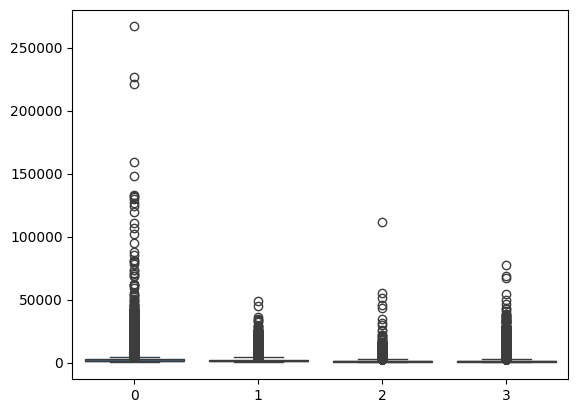

In [20]:
sns.boxplot(read_length_all_group)

(0.0, 10000.0)

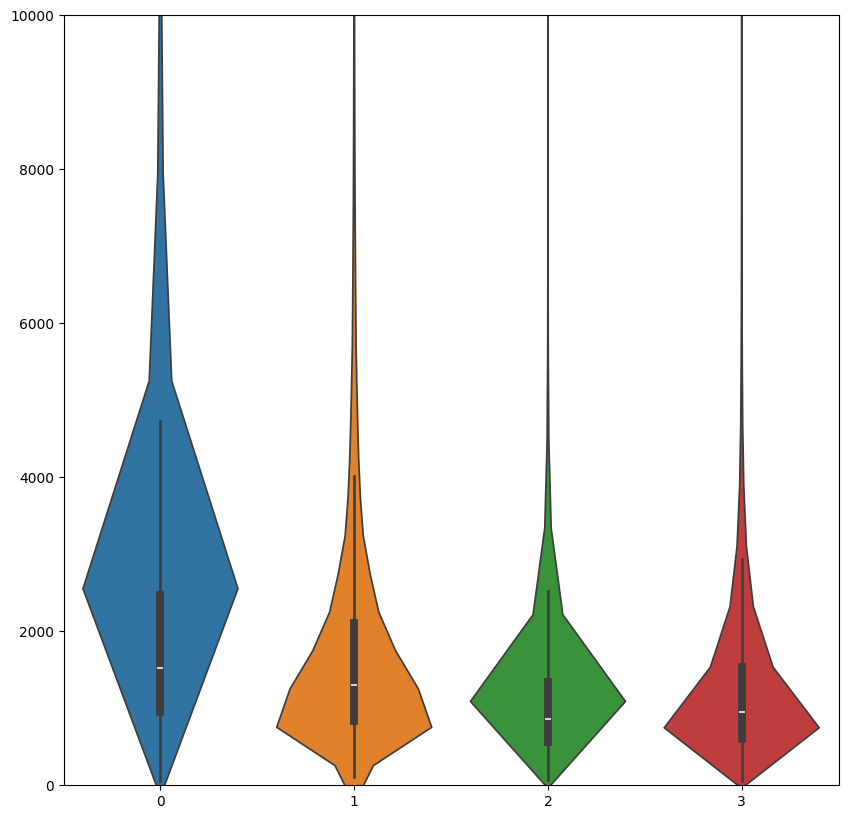

In [25]:
plt.figure(figsize=(10, 10))
sns.violinplot(read_length_all_group)
plt.ylim(0, 10000)

<Axes: ylabel='Count'>

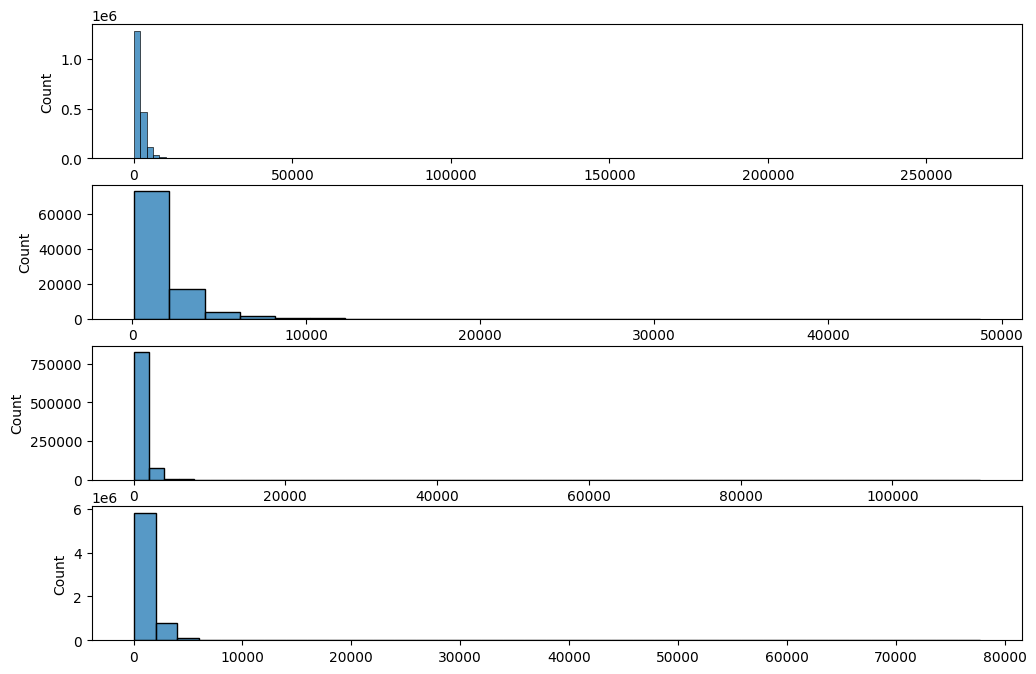

In [47]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
ax = ax.flatten()

sns.histplot(read_length_all_group[0], binwidth=2000, ax=ax[0])
sns.histplot(read_length_all_group[1], binwidth=2000, ax=ax[1])
sns.histplot(read_length_all_group[2], binwidth=2000, ax=ax[2])
sns.histplot(read_length_all_group[3], binwidth=2000, ax=ax[3])

(0.0, 10000.0)

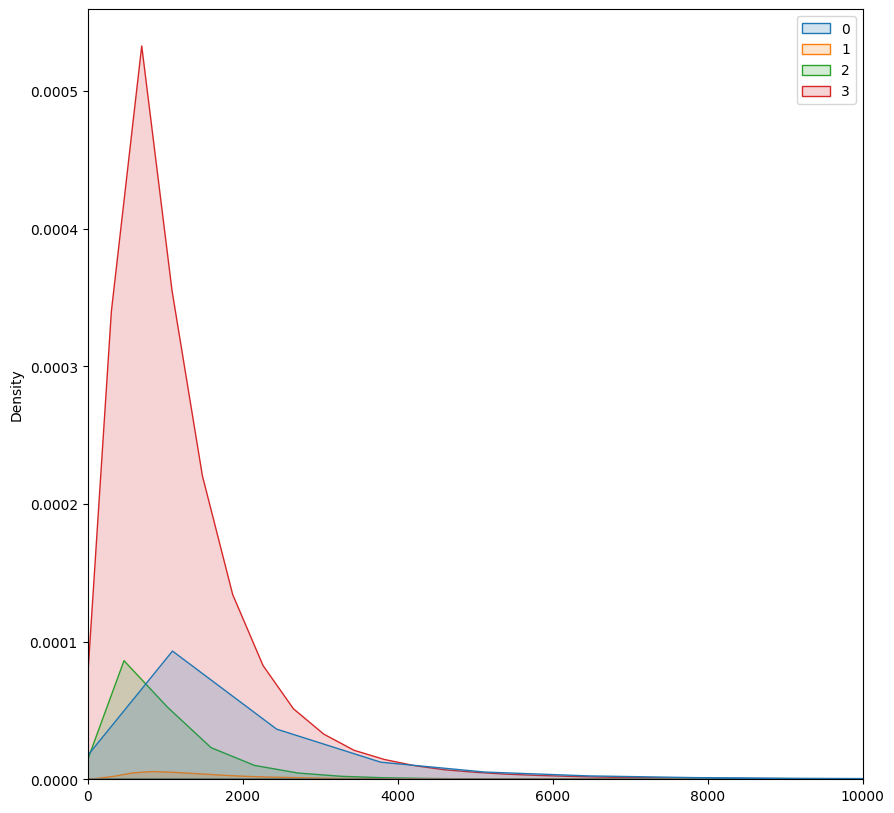

In [52]:
plt.figure(figsize=(10,10))
sns.kdeplot(read_length_all_group, fill=True, alpha=0.2)
plt.xlim(0, 10000)